30.66919


/var/folders/wt/_xklnt_x7m9ckxtll_10y8840000gn/T/ipykernel_16214/92343054.py:8: RuntimeWarning: divide by zero encountered in log
  peaks, properties = scipy.signal.find_peaks(np.log(array))
/var/folders/wt/_xklnt_x7m9ckxtll_10y8840000gn/T/ipykernel_16214/92343054.py:8: RuntimeWarning: invalid value encountered in log
  peaks, properties = scipy.signal.find_peaks(np.log(array))


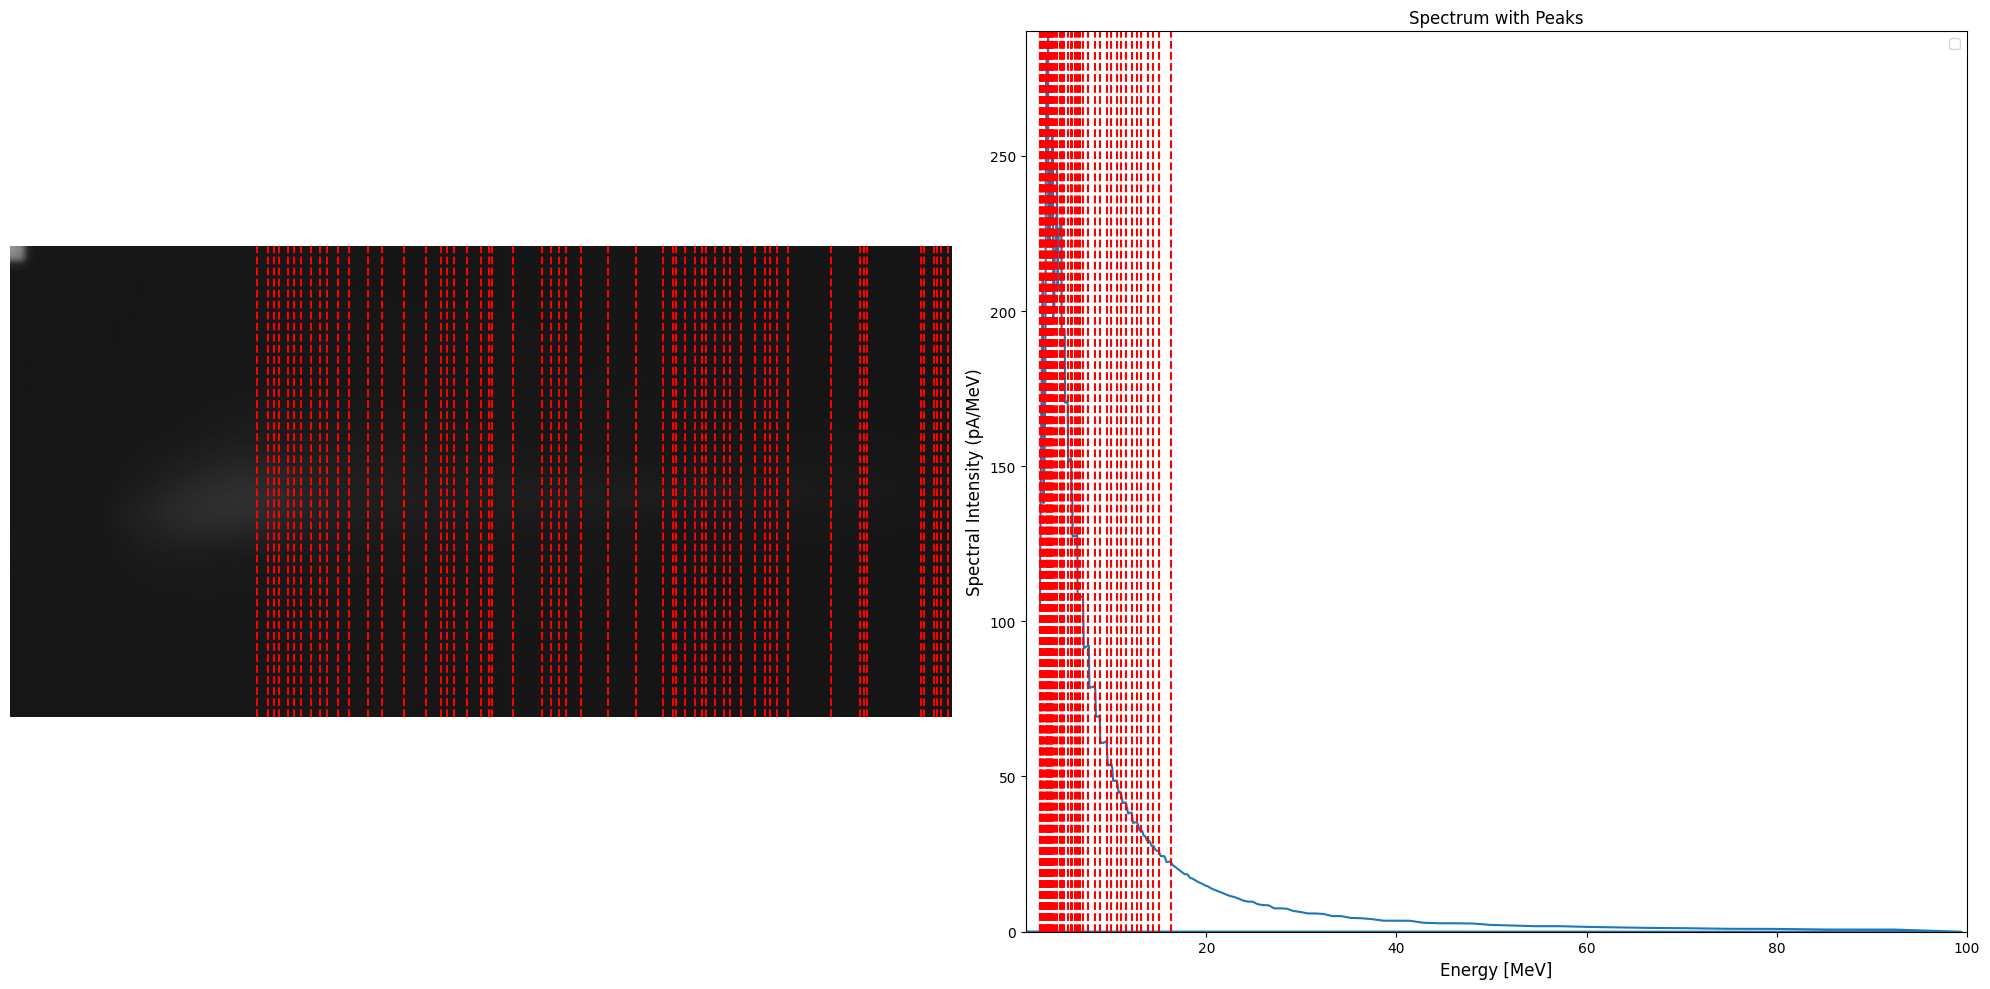

In [23]:
import scipy.signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scan import calc_spec, deflection_calc, index_to_MeV, deflection_biexp_calc

def find_peaks(array):
    peaks, properties = scipy.signal.find_peaks(np.log(array))
    return peaks, properties

def get_y_lims_within_xlim(x, y, xlim):
    """Find the min and max y-values within the specified x-limits using PyTorch."""
    within_xlim = (x >= xlim[0]) & (x <= xlim[1])
    y_within_xlim = y[within_xlim]
    return [np.min(y_within_xlim), np.max(y_within_xlim)] if len(y_within_xlim) > 0 else [np.min(y), np.max(y)]

# deflection_MeV, _ = deflection_biexp_calc(512, 62)
deflection_MeV = deflection_calc(512, 62)
print(deflection_MeV[100])
img = cv2.imread("test/12/15.png", cv2.IMREAD_UNCHANGED)
array = calc_spec(img/255, 62, deflection_MeV, 20, 0, True, None)
peaks, prominences = find_peaks(array)
peak_positions = [index_to_MeV(peak, deflection_MeV) for peak in peaks]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Create two subplots side by side

# Plot the image with peaks
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for peak in peaks:
    ax1.axvline(x=peak, color='red', linestyle='--')
ax1.axis('off')

# Plot the spectrum and mark the peaks
xlim = (1, 100)
ax2.plot(deflection_MeV, array)
for peak in peak_positions:
    ax2.axvline(x=peak, color='red', linestyle='--')#, label=f'{index_to_MeV(peak, deflection_MeV)} MeV')
ax2.set_title('Spectrum with Peaks')
ax2.set_ylabel('Spectral Intensity (pA/MeV)', fontsize=12)
ax2.set_xlabel('Energy [MeV]', fontsize=12)
ax2.set_xlim(xlim)
y_lims = get_y_lims_within_xlim(deflection_MeV, array, xlim)
ax2.set_ylim(y_lims)

# Adding a legend to show peak positions in MeV, avoiding duplicates
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Removing duplicates
ax2.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()
